# Decision Tree Classifier

##  Import common packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the dataset

dataset source: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

In [2]:
# Import the data
df = pd.DataFrame(pd.read_csv('sample_data/houses_to_rent_v2_wrangled.csv'))

df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,0,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,0,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,0,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,0,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,0,0,0,0,800,25,11,836


## Prepare the training and testing sets

In [3]:
# split our dataset between attributes and labels.

X = df.iloc[:, 1:-1].values # data: Excludes 'city' & 'total(R$)'
y = df.iloc[:, 0].values # target: Includes 'city' only

In [4]:
#Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Fit the Decision Tree Classifier model

In [5]:
#Create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state = 0,min_samples_split=2,min_samples_leaf=1,max_depth=None)

In [6]:
#Fit the decision tree classifier
model = clf.fit(X_train, y_train)

In [7]:
#Prediction
y_pred = model.predict(X_test)

## Accuracy & Performance Results

In [8]:
from sklearn import metrics

#Print accuracy
print(metrics.accuracy_score(y_pred, y_test))

0.6184062850729517


In [9]:
print(clf.feature_importances_)

[0.1563763  0.04485344 0.03456387 0.0585226  0.         0.02267726
 0.01646508 0.16421073 0.17764022 0.17956155 0.14512896]


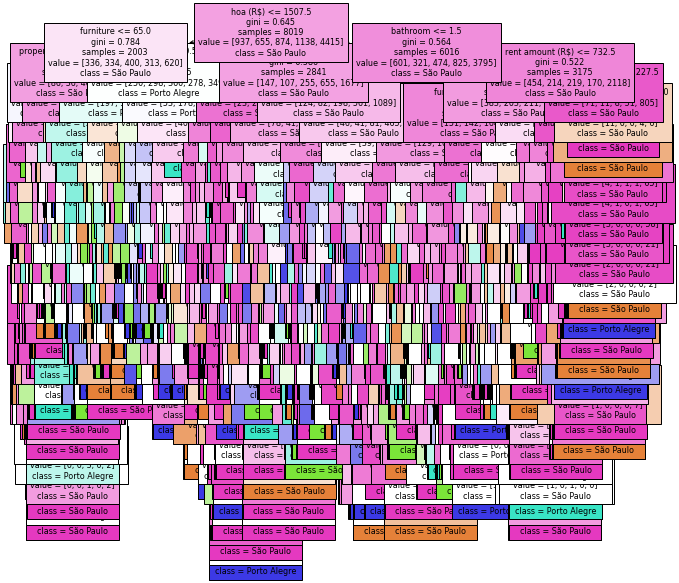

In [10]:
from sklearn.tree import export_graphviz
from graphviz import Source

fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf, feature_names=df.columns, class_names=df.city,
              fontsize=8, filled=True)
plt.show()

# Using different parameters to replicate the model

### What if we only tried to predict for two classes?

In [11]:
## Building a model to classify one city vs the rest (Sao Paulo Vs. All other cities in the dataset)
df.city = pd.Series(np.where(df.city == 'São Paulo','São Paulo','Other City'))

In [12]:
X = df.iloc[:, 1:-1].values # data: Excludes 'city' & 'total(R$)'
y = df.iloc[:, 0].values # target: Includes 'city' only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(random_state = 0,min_samples_split=2,min_samples_leaf=1,max_depth=None)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
print(metrics.accuracy_score(y_pred, y_test))

0.7508417508417509


In [14]:
print(clf.feature_importances_)

[0.15009428 0.05086556 0.02221435 0.05236317 0.         0.01537711
 0.01484365 0.1543497  0.22817304 0.19246071 0.11925843]


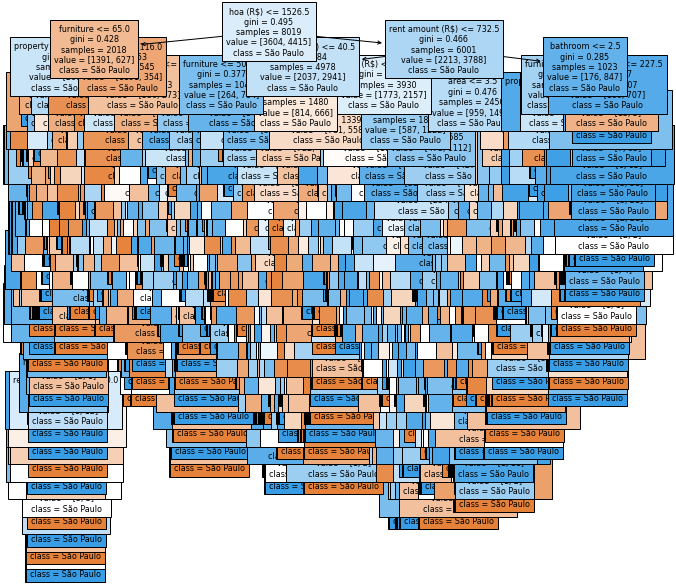

In [15]:
from sklearn.tree import export_graphviz
from graphviz import Source

fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf, feature_names=df.columns, class_names=df.city,
              fontsize=8, filled=True)
plt.show()

## What if we retained the predictor variables that are the most influential to the model?

i.e. the attribute features with >= 10% in feature importance:
* 'area',
* 'hoa',
* 'rent amount',
* 'property tax',
* 'fire insurance'

In [16]:
# Classification with a handful of the most revealing predictor variables
X = df[['area','hoa (R$)','rent amount (R$)','property tax (R$)','fire insurance (R$)']].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(random_state = 0,min_samples_split=2,min_samples_leaf=1,max_depth=None)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
print(metrics.accuracy_score(y_pred, y_test))

0.7530864197530864


In [19]:
print(clf.feature_importances_)

[0.18659807 0.17549178 0.2528552  0.21009731 0.17495764]


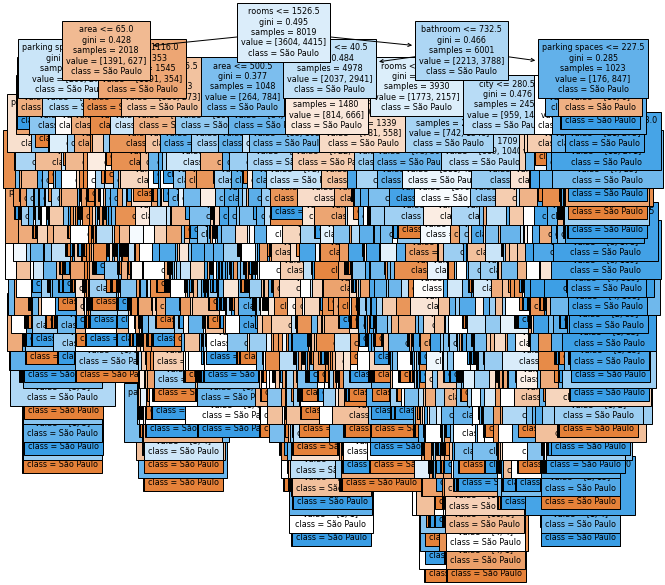

In [20]:
from sklearn.tree import export_graphviz
from graphviz import Source

fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf, feature_names=df.columns, class_names=df.city,
              fontsize=8, filled=True)
plt.show()

Not great still.

## Changing parameters in the algorithm

<b>Criterion</b>: defines what function will be used to measure the quality of a split

Change the 'criterion' parameter from the default ('gini') to 'entropy

In [50]:
clf = DecisionTreeClassifier(random_state = 0,min_samples_split=2,
                             min_samples_leaf=1,max_depth=None,criterion='entropy')
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test))

0.7676767676767676


Slightly better, but does that even matter?

<b>Max_depth</b>: defines the maximum depth of the tree. If it’s “none”, the tree will be as long as possible, when all the leaves are pure (risk of overfitting the model). I.e. it will keep-on going to seek patterns until there are none left.

'Code from: https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752'

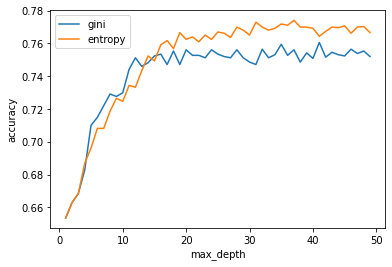

In [52]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,50):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(metrics.accuracy_score(y_test, pred))
 ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(metrics.accuracy_score(y_test, pred))
 ####
    max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

display(str('Code from: ' + 'https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752'))

## Pruning the model

The process of reducing size of trees that are too large due to noise and overfitting, which reduces the efficiency and accuracy of data.

Objective: make a simple tree, using one of two methods:
1. Early Stopping
2. Pruning

Pruning: Reduce the number of leaves per nodes.
Total Cost = measure of fit (classification error in the training set) + measure of complexity (number of leaves)
            = Error(T) + L(T)
             = Error(T) + Lambda L(T) where Lambda is between 0 & infinity
            Lambda is meant to balance fit and complexity.
            
Step 1: Consider a split in the model
Step 2: Compute the total Cost C(T) of split
Step 3: Prune if total cost C(T) is lower: C(Tsmaller) =< C(T)

In [55]:
clf = DecisionTreeClassifier(random_state = 0,min_samples_split=2,
                             min_samples_leaf=1,max_depth=30,criterion='entropy')
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test))

0.7725402169846615


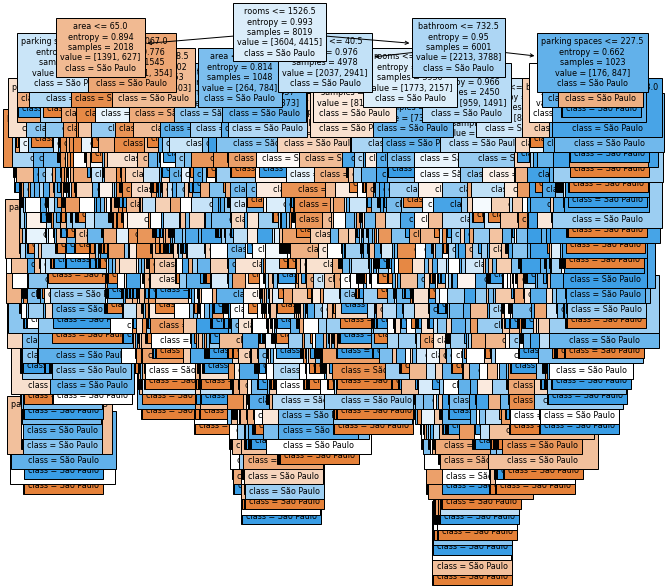

In [54]:
from sklearn.tree import export_graphviz
from graphviz import Source

fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf, feature_names=df.columns, class_names=df.city,
              fontsize=8, filled=True)
plt.show()

# Using a different dataset to test the model

data source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [71]:
# Import the data
df = pd.DataFrame(pd.read_csv('sample_data/data.csv'))

display(df.columns)
display(df.dtypes)

df.head()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [67]:
# split our dataset between attributes and labels.

X = df.iloc[:, 2:-1].values # data: Excludes 'id','diagnosis' & 'Unnamed: 32'
y = df.iloc[:, 1].values # target: Includes 'diagnosis' only

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(random_state = 0,min_samples_split=2,min_samples_leaf=1,max_depth=None)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [69]:
print(metrics.accuracy_score(y_pred, y_test))

0.8811188811188811


In [70]:
print(clf.feature_importances_)

[0.         0.0096886  0.         0.         0.         0.
 0.         0.71160121 0.         0.         0.01948008 0.
 0.         0.01676117 0.017502   0.         0.         0.
 0.         0.         0.         0.06706044 0.         0.11373562
 0.         0.03421113 0.00995974 0.         0.         0.        ]


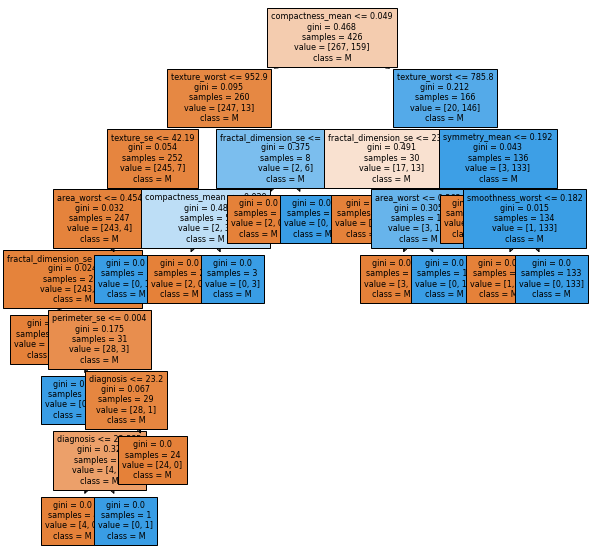

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf, feature_names=df.columns, class_names=df.diagnosis,
              fontsize=8, filled=True)
plt.show()

'Code from: https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752'

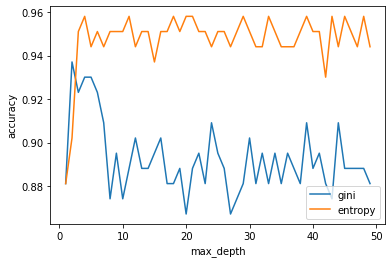

In [74]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,50):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(metrics.accuracy_score(y_test, pred))
 ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(metrics.accuracy_score(y_test, pred))
 ####
    max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

display(str('Code from: ' + 'https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752'))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(random_state = 0,min_samples_split=2,
                             min_samples_leaf=1,max_depth=7,criterion='entropy')
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test))

0.958041958041958


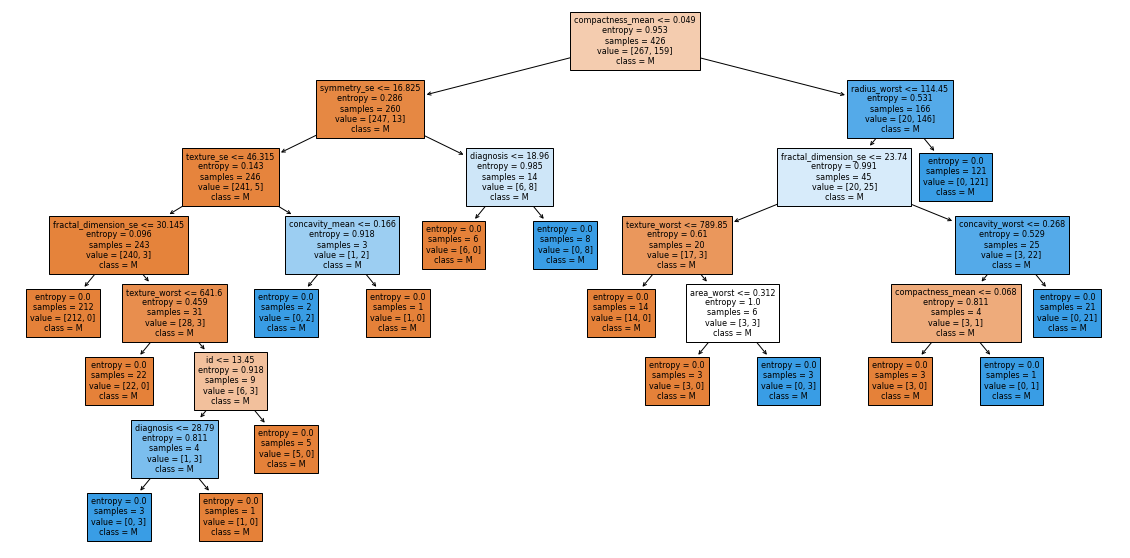

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
tree.plot_tree(clf, feature_names=df.columns, class_names=df.diagnosis,
              fontsize=8, filled=True)
plt.show()

# Further Learning

* https://www.coursera.org/lecture/ml-classification/optional-pruning-decision-trees-to-avoid-overfitting-qvf6v
* https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://www.displayr.com/machine-learning-pruning-decision-trees/
* https://pdfs.semanticscholar.org/025b/8c109c38dc115024e97eb0ede5ea873fffdb.pdf